## MNIST
![nn](https://wikidocs.net/images/page/60324/mnist.png)
MNIST는 숫자 0부터 9까지의 이미지로 구성된 손글씨 데이터셋입니다. MNIST 문제는 손글씨로 적힌 숫자 이미지가 들어오면, 그 이미지가 무슨 숫자인지 맞추는 문제입니다
- 총 60,000개의 훈련 데이터와 레이블, 총 10,000개의 테스트 데이터와 레이블로 구성되어져 있습니다.
- 레이블은 0부터 9까지 총 10개입니다.
![nn](https://wikidocs.net/images/page/60324/mnist_SVbcYYG.png)
각각의 이미지는 아래와 같이 28 픽셀 × 28 픽셀의 이미지입니다.

In [26]:
for X, Y in data_loader:
    # 입력 이미지를 [batch_size × 784]의 크기로 reshape
    # 레이블은 원-핫 인코딩
    X = X.view(-1, 28*28)

In [2]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [3]:
USE_CUDA = torch.cuda.is_available() # GPU를 사용가능하면 True, 아니라면 False를 리턴
device = torch.device("cuda" if USE_CUDA else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
print("다음 기기로 학습합니다:", device)

다음 기기로 학습합니다: cuda


In [4]:
# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [17]:
# hyperparameters
training_epochs = 30
batch_size = 100

dsets.MNIST()
- 첫번째 인자 root는 MNIST 데이터를 다운로드 받을 경로입니다. 
- 두번째 인자 train은 인자로 True를 주면, MNIST의 훈련 데이터를 리턴받으며 False를 주면 테스트 데이터를 리턴받습니다. 
- 세번째 인자 transform은 현재 데이터를 파이토치 텐서로 변환해줍니다. 
- 네번째 인자 download는 해당 경로에 MNIST 데이터가 없다면 다운로드 받겠다는 의미입니다.

In [6]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

Extracting MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz to MNIST_data/MNIST\raw


Extracting MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw


Extracting MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST_data/MNIST\raw




Extracting MNIST_data/MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw
Processing...
Done!


DataLoader()
- 첫번째 인자인 DataLoader는 로드할 대상을 의미하며, 
- 두번째 인자인 batch_size는 배치 크기, 
- shuffle은 매 에포크마다 미니 배치를 셔플할 것인지의 여부, 
- drop_last는 마지막 배치를 버릴 것인지를 의미합니다.

In [7]:
# dataset loader
data_loader = DataLoader(dataset=mnist_train,
                                          batch_size=batch_size, # 배치 크기는 100
                                          shuffle=True,
                                          drop_last=True)

In [28]:
# MNIST data image of shape 28 * 28 = 784
# input_dim은 784이고, output_dim은 10
linear = nn.Linear(784, 10, bias=True).to(device)

In [9]:
# 비용 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss().to(device) # 내부적으로 소프트맥스 함수를 포함하고 있음.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [18]:
for epoch in range(training_epochs): # 앞서 training_epochs의 값은 15로 지정함.
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # 배치 크기가 100이므로 아래의 연산에서 X는 (100, 784)의 텐서가 된다.
        X = X.view(-1, 28 * 28).to(device)
        # 레이블은 원-핫 인코딩이 된 상태가 아니라 0 ~ 9의 정수.
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.273007214
Epoch: 0002 cost = 0.271765709
Epoch: 0003 cost = 0.270439863
Epoch: 0004 cost = 0.269389957
Epoch: 0005 cost = 0.268361568
Epoch: 0006 cost = 0.267281145
Epoch: 0007 cost = 0.266453356
Epoch: 0008 cost = 0.265663326
Epoch: 0009 cost = 0.264719427
Epoch: 0010 cost = 0.264133900
Epoch: 0011 cost = 0.263250947
Epoch: 0012 cost = 0.262565106
Epoch: 0013 cost = 0.261892438
Epoch: 0014 cost = 0.261306316
Epoch: 0015 cost = 0.260875463
Epoch: 0016 cost = 0.260000616
Epoch: 0017 cost = 0.259440660
Epoch: 0018 cost = 0.259239525
Epoch: 0019 cost = 0.258406490
Epoch: 0020 cost = 0.258077025
Epoch: 0021 cost = 0.257601261
Epoch: 0022 cost = 0.257106870
Epoch: 0023 cost = 0.256734610
Epoch: 0024 cost = 0.256343782
Epoch: 0025 cost = 0.255746752
Epoch: 0026 cost = 0.255572259
Epoch: 0027 cost = 0.255009651
Epoch: 0028 cost = 0.254598707
Epoch: 0029 cost = 0.254366159
Epoch: 0030 cost = 0.254047930
Learning finished


Accuracy: 0.8755999803543091
Label:  8
Prediction:  8


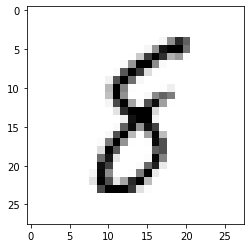

In [25]:
# 테스트 데이터를 사용하여 모델을 테스트한다.
with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다.
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()